# Analysis of Genes in Cell Types

Prior to running this Notebook you must generate **gene_in_cell_type.csv** file by running **02-batch_run_expression** Notebook


Note `include_gene_in_cells = True` must be set to **True**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
input_dir='./output_data/experiment1'
genes_in_cell_type_df = pd.read_csv(f'{input_dir}/genes_in_cell_type_group.csv') 
cell_types = genes_in_cell_type_df.columns
cell_types = cell_types[1:] # drop wormbase_id
#genes_in_cell_type_df

In [7]:
genes_in_cell_type_df['expressed_count'] = genes_in_cell_type_df[cell_types].count(axis=1)
genes_in_cell_type_df = genes_in_cell_type_df.fillna(0)
genes_in_cell_type_df['expressed_sum'] = genes_in_cell_type_df[cell_types].sum(axis=1)

# Print the result

genes_in_cell_type_sorted = genes_in_cell_type_df.sort_values(['expressed_count', 'expressed_sum'], ascending=[False, False])
genes_in_cell_type_sorted


,wormbase_id,Germline,Egg-laying apparatus,Hypodermis,Neurons,Body wall muscle,Somatic gonad,Seam,Rectum,Excretory,...,Coelomocytes,Support cells,Intestine,Head mesodermal cell,Unassigned,Atypical cells,GLR cells,Embryonic,expressed_count,expressed_sum
20,WBGene00004424,44987.0,1851.0,9673.0,12089.0,8573.0,18758.0,837.0,651.0,1457.0,...,1917.0,2946.0,8206.0,138.0,1210.0,26.0,229.0,116.0,18,116449.0
91,WBGene00004478,45546.0,1672.0,8407.0,10925.0,7789.0,16946.0,724.0,608.0,1335.0,...,1880.0,2559.0,7526.0,131.0,1072.0,27.0,197.0,103.0,18,109514.0
63,WBGene00009119,43659.0,1876.0,8160.0,8826.0,8910.0,17068.0,701.0,566.0,1179.0,...,1931.0,2475.0,7037.0,142.0,1158.0,19.0,135.0,110.0,18,108414.0
0,WBGene00010964,42455.0,1715.0,8049.0,11606.0,6978.0,16514.0,1251.0,325.0,991.0,...,1400.0,2696.0,6069.0,118.0,997.0,40.0,223.0,81.0,18,105305.0
39,WBGene00006439,35885.0,1606.0,7482.0,9333.0,9352.0,15479.0,666.0,483.0,831.0,...,1914.0,1978.0,6599.0,124.0,1082.0,20.0,190.0,113.0,18,98076.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,WBGene00003758,8.0,2.0,6.0,726.0,8.0,4.0,4.0,4.0,5.0,...,0.0,30.0,4.0,0.0,1.0,0.0,0.0,0.0,13,803.0
85,WBGene00018803,2.0,0.0,4.0,163.0,1.0,2.0,2.0,5.0,0.0,...,7.0,13.0,0.0,0.0,0.0,0.0,0.0,1.0,11,201.0
21,WBGene00013103,5.0,12.0,63.0,3.0,0.0,2.0,56.0,0.0,2.0,...,0.0,46.0,1.0,0.0,2.0,0.0,0.0,0.0,11,194.0
44,WBGene00000739,2.0,89.0,67.0,4.0,0.0,0.0,24.0,6.0,1.0,...,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,9,246.0


In [8]:
rows = 50
df_subset = genes_in_cell_type_sorted[cell_types].head(rows)
yticks = genes_in_cell_type_sorted['wormbase_id'].head(rows)
yticks

20    WBGene00004424
91    WBGene00004478
63    WBGene00009119
0     WBGene00010964
39    WBGene00006439
27    WBGene00001168
1     WBGene00010965
64    WBGene00004408
54    WBGene00004436
57    WBGene00004431
30    WBGene00018846
83    WBGene00004413
87    WBGene00004416
22    WBGene00004414
3     WBGene00004427
53    WBGene00004412
10    WBGene00004473
16    WBGene00010556
60    WBGene00001167
8     WBGene00004419
76    WBGene00008920
25    WBGene00000229
79    WBGene00000915
55    WBGene00004415
17    WBGene00000698
62    WBGene00003902
66    WBGene00010419
69    WBGene00000713
68    WBGene00000712
86    WBGene00000609
23    WBGene00006537
42    WBGene00000066
74    WBGene00019466
40    WBGene00000608
71    WBGene00020808
19    WBGene00000703
84    WBGene00011392
81    WBGene00000214
77    WBGene00010204
43    WBGene00006926
92    WBGene00000114
32    WBGene00001386
45    WBGene00018519
90    WBGene00000657
15    WBGene00000696
14    WBGene00000693
49    WBGene00000754
34    WBGene0

/tmp/ipykernel_269491/866695899.py:7: RuntimeWarning: divide by zero encountered in log
  df_log = df_subset.applymap(lambda x: np.log(x))


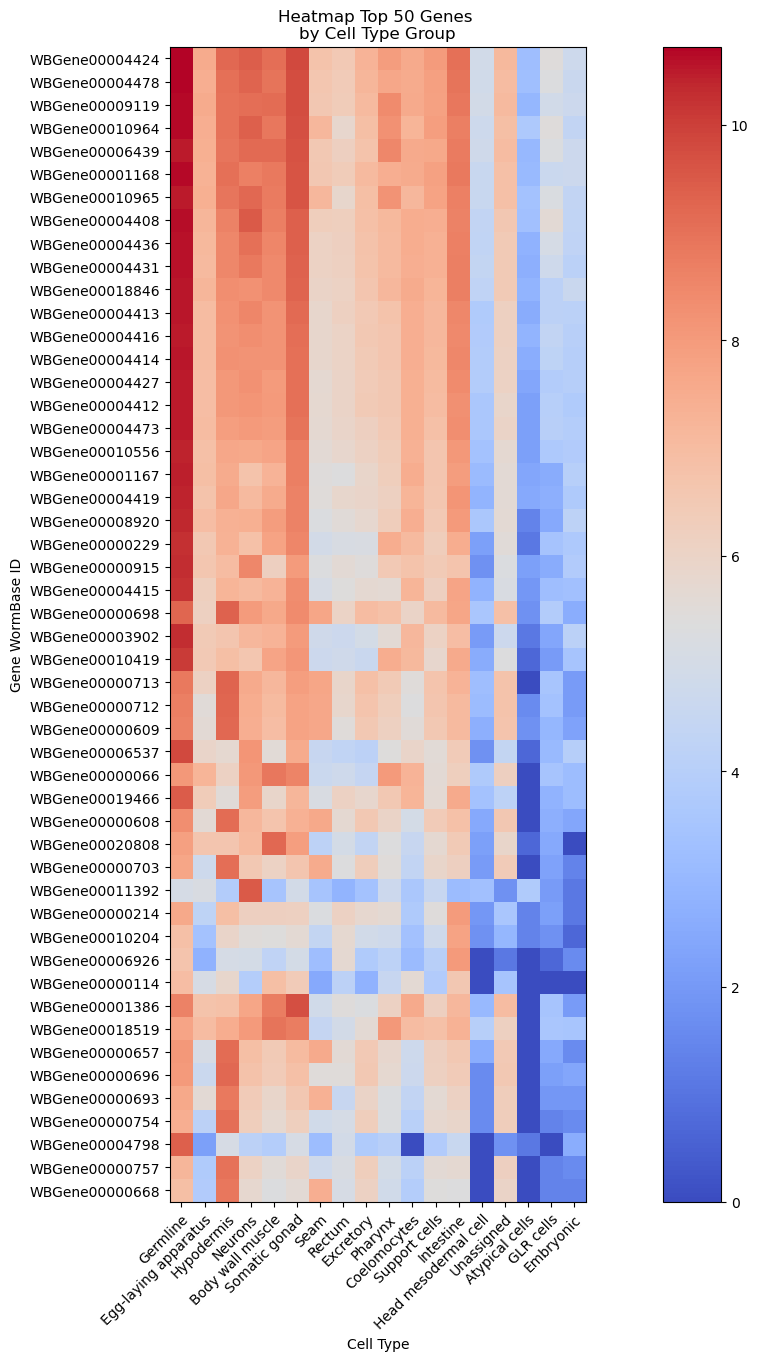

,Germline,Egg-laying apparatus,Hypodermis,Neurons,Body wall muscle,Somatic gonad,Seam,Rectum,Excretory,Pharynx,Coelomocytes,Support cells,Intestine,Head mesodermal cell,Unassigned,Atypical cells,GLR cells,Embryonic
20,10.714129,7.523481,9.177094,9.400051,9.056373,9.839376,6.729824,6.478510,7.284135,7.932003,7.558517,7.988204,9.012621,4.927254,7.098376,3.258097,5.433722,4.753590
91,10.726478,7.421776,9.036820,9.298809,8.960468,9.737787,6.584791,6.410175,7.196687,7.633854,7.539027,7.847372,8.926119,4.875197,6.977281,3.295837,5.283204,4.634729
63,10.684165,7.536897,9.006999,9.085457,9.094930,9.744961,6.552508,6.338594,7.072422,8.403352,7.565793,7.813996,8.858937,4.955827,7.054450,2.944439,4.905275,4.700480
0,10.656200,7.447168,8.993303,9.359277,8.850518,9.711964,7.131699,5.783825,6.898715,8.241967,7.244228,7.899524,8.710949,4.770685,6.904751,3.688879,5.407172,4.394449
39,10.488075,7.381502,8.920255,9.141312,9.143346,9.647240,6.501290,6.180017,6.722630,8.504918,7.556951,7.589842,8.794673,4.820282,6.986566,2.995732,5.247024,4.727388
27,10.676162,7.315218,9.027259,8.666819,8.799360,9.633056,6.555357,6.361302,7.074117,7.421776,7.534228,7.815611,8.806424,4.605170,6.837333,3.091042,4.663439,4.700480
1,10.494270,7.390181,8.909776,9.207135,8.798757,9.604340,7.126087,5.855072,6.904751,8.205492,7.154615,7.780303,8.652947,4.584967,6.854355,3.433987,5.225747,4.382027
64,10.604950,7.167809,8.619930,9.509185,8.685247,9.371864,6.276643,6.224558,6.856462,7.100027,7.499977,7.440734,8.607399,4.382027,6.545350,3.332205,5.590987,4.356709
54,10.587316,7.093405,8.483223,9.044286,8.534640,9.352708,6.073045,6.186209,6.752270,7.055313,7.473637,7.366445,8.673000,4.356709,6.431331,2.772589,5.056246,4.276666
57,10.559296,7.054450,8.501470,8.799360,8.453614,9.308011,6.070738,6.131226,6.740519,7.054450,7.452982,7.350516,8.684909,4.418841,6.416732,2.708050,4.795791,4.127134


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Create heatmap
#fig = plt.figure(figsize=(8, 4))
fig, ax = plt.subplots(figsize=(20, 15))
df_log = df_subset.applymap(lambda x: np.log(x))
df_log = df_log.replace(-np.inf, 0)


im = ax.imshow(df_log, cmap='coolwarm')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set tick labels
ax.set_xticks(np.arange(len(cell_types)))
ax.set_yticks(np.arange(len(yticks)))
ax.set_xticklabels(cell_types)
ax.set_yticklabels(yticks)

# Rotate tick labels and set label for x and y axis
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
ax.set_title("Heatmap Top 50 Genes \nby Cell Type Group")
ax.set_xlabel('Cell Type')
ax.set_ylabel('Gene WormBase ID')

# Display plot
plt.show()
df_log